In [1]:
#Data Pre-Processing Steps

import re
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer

def preprocess_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_text(text)
    text = remove_emoji(text)
    text = convert_num_to_label(text)
    
    lemmatizer = WordNetLemmatizer()
    text = lemmatize_text(text, lemmatizer)
    
    return text

def remove_punctuation(text: str) -> str:
    return "".join([c for c in text if c not in string.punctuation])

def lower_text(text: str) -> str:
    return text.lower()

def remove_emoji(text: str) -> str:
    emoji_pattern = re.compile("["
                               "\U0001F600-\U0001F64F"  # emoticons
                               "\U0001F300-\U0001F5FF"  # symbols & pictographs
                               "\U0001F680-\U0001F6FF"  # transport & map symbols
                               "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "\U00002702-\U000027B0"
                               "\U000024C2-\U0001F251"
                               "]+",
                               flags=re.UNICODE)
    return emoji_pattern.sub(r"", text)

def convert_num_to_label(text: str) -> str:
    num_pattern = re.compile("[0-9]+")
    return num_pattern.sub(r"number", text)

def lemmatize_text(text: str, lemmatizer: WordNetLemmatizer = WordNetLemmatizer()) -> str:
    text = text.lower()
    return " ".join(lemmatizer.lemmatize(word) for word in text.split())


file_path = "DatasetCopy.csv"


df = pd.read_csv(file_path, sep=',')

# Handling the missing values in the 'text' column
df['text'].fillna('', inplace=True)

# Preprocess the 'text' column in the dataframe
df['preprocessed_text'] = df['text'].apply(preprocess_text)

#df['label'] = df['label'].astype('int')  # Uncomment this line if 'label' column contains numeric labels

# Save the preprocessed dataframe back to a new file (optional)
preprocessed_file_path = "preprocessed_dataset.tsv"
df.to_csv(preprocessed_file_path, sep='\t', index=False)


In [2]:
# Load the preprocessed dataframe from the saved file
loaded_df = pd.read_csv(preprocessed_file_path, sep='\t')

# Replace the "text" column with the "preprocessed_text" column
loaded_df["text"] = loaded_df["preprocessed_text"]
loaded_df1 = loaded_df.drop(columns=["preprocessed_text"])

print(loaded_df1[["text", "label"]])


                                                   text  label
0                 flash sale limited time only shop now    1.0
1                                       pillowcase sham    0.0
2                limited time offer buy now or miss out    2.0
3                                        write a review    0.0
4     to start your return simply click on the follo...    0.0
...                                                 ...    ...
2451                                      bra panty set    0.0
2452  dressesfootwearhatshoodies sweatshirtsjerseysp...    0.0
2453                          only number left in stock    1.0
2454                                    trending player    0.0
2455                               number left in stock    1.0

[2456 rows x 2 columns]


In [3]:
missing_values = loaded_df1['label'].isnull().sum()
print("Number of missing values in 'label' column:", missing_values)


Number of missing values in 'label' column: 8


In [4]:
loaded_df1.dropna(subset=['label'], inplace=True)
missing_values = loaded_df1['label'].isnull().sum()
print("Number of missing values in 'label' column:", missing_values)



Number of missing values in 'label' column: 0


In [5]:
# Convert the "label" column from float64 to int64
loaded_df1['label'] = loaded_df1['label'].astype('int64')


In [6]:
print("Column Names:")
print(loaded_df1.columns)

# Print the data types of each column
print("\nData Types:")
print(loaded_df1.dtypes)

Column Names:
Index(['page_id', 'text', 'label', 'Pattern Category'], dtype='object')

Data Types:
page_id             float64
text                 object
label                 int64
Pattern Category     object
dtype: object


# Logistic Regression Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score
import nltk

def init() -> None:
    try:
        nltk.data.find("wordnet")
    except LookupError:
        nltk.download("wordnet")


if __name__ == "__main__":
    init()  
    #loaded_df = pd.read_csv(preprocessed_file_path, delimiter="\t")
    loaded_df1['text'].fillna('', inplace=True)

    # Split the data into features (X) and labels (y)
    X = loaded_df1['text']
    y = loaded_df1['label']

    # Create a CountVectorizer to convert text data to numerical features
    count_vectorizer = CountVectorizer(ngram_range=(1, 1))
    X_transformed = count_vectorizer.fit_transform(X)

    # Split the data into 70% training and 30% testing
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

    # Create a Logistic Regression model
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train, y_train)

    y_pred = logistic_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred , average='weighted')
    precision = precision_score(y_test, y_pred , average='weighted')

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision Score:", precision)


Accuracy: 0.9401360544217687
F1 Score: 0.9405025571872584
Precision Score: 0.9428719710068552


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/basabdattachaudhury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


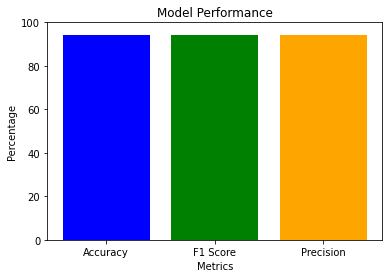

In [8]:
import matplotlib.pyplot as plt

accuracy_percentage = accuracy * 100
f1_percentage = f1 * 100
precision_percentage = precision * 100

labels = ['Accuracy', 'F1 Score', 'Precision']
scores = [accuracy_percentage, f1_percentage, precision_percentage]

plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Model Performance')
plt.ylim(0, 100)  
plt.show()


# Logistic Regression with HyperParameter Tuning

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV

def init() -> None:
    try:
        nltk.data.find("wordnet")
    except LookupError:
        nltk.download("wordnet")

if __name__ == "__main__":
    init()  
    loaded_df1['text'].fillna('', inplace=True)

   
    X = loaded_df1['text']
    y = loaded_df1['label']


    count_vectorizer = CountVectorizer(ngram_range=(1, 1))
    X_transformed = count_vectorizer.fit_transform(X)

    # Split the data into 70% training and 30% testing with a different random state (e.g., 123)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=123)

    # Define the hyperparameter grid for tuning
    param_grid = {
        'C': [0.01, 0.1, 1, 10],  # Regularization parameter
        'max_iter': [100, 200, 300]  # Maximum number of iterations
    }

    logistic_model = LogisticRegression(random_state=456)

    # Create GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    print("Best hyperparameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision Score:", precision)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/basabdattachaudhury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best hyperparameters: {'C': 1, 'max_iter': 100}
Accuracy: 0.9387755102040817
F1 Score: 0.9385746167700334
Precision Score: 0.9409100999871665


# Multi-Layer Perceptron ( Deep learning Model )

In [11]:
import pandas as pd
import numpy as np

X = loaded_df1['text']
y = loaded_df1['label']


count_vectorizer = CountVectorizer()
X_transformed = count_vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Define the MLP model class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros(self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros(self.output_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.output = self.softmax(self.z2)
        return self.output

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def backward(self, x, y, learning_rate=0.01):
        batch_size = x.shape[0]
        delta3 = self.output - self.one_hot(y)
        dW2 = np.dot(self.a1.T, delta3) / batch_size
        db2 = np.sum(delta3, axis=0) / batch_size
        delta2 = np.dot(delta3, self.weights2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(x.T, delta2) / batch_size
        db1 = np.sum(delta2, axis=0) / batch_size

        # Update weights and biases
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1

    def one_hot(self, y):
        one_hot_y = np.zeros((len(y), self.output_size))
        one_hot_y[np.arange(len(y)), y] = 1
        return one_hot_y

    def train(self, X, y, num_epochs=1000, learning_rate=0.01):
        for epoch in range(num_epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

# Set the input size, hidden size, and output size according to the number of features and classes in your dataset
input_size = X_train.shape[1]  # Number of features
hidden_size = 64
output_size = len(y_train.unique())  # Number of classes

model = MLP(input_size, hidden_size, output_size)
model.train(X_train.toarray(), y_train)
y_pred_encoded = model.forward(X_test.toarray())
y_pred = np.argmax(y_pred_encoded, axis=1)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision Score:", precision)


Accuracy: 0.7360544217687075
F1 Score: 0.7433924005586353
Precision Score: 0.751785583280151


# MLP with Hyperparameter Tuning

In [19]:
from copy import deepcopy


X = loaded_df1['text']
y = loaded_df1['label']

count_vectorizer = CountVectorizer()
X_transformed = count_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Define the MLP model class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros(self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros(self.output_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.output = self.softmax(self.z2)
        return self.output

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def backward(self, x, y, learning_rate=0.01):
        batch_size = x.shape[0]
        delta3 = self.output - self.one_hot(y)
        dW2 = np.dot(self.a1.T, delta3) / batch_size
        db2 = np.sum(delta3, axis=0) / batch_size
        delta2 = np.dot(delta3, self.weights2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(x.T, delta2) / batch_size
        db1 = np.sum(delta2, axis=0) / batch_size

        # Update weights and biases
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1

    def one_hot(self, y):
        one_hot_y = np.zeros((len(y), self.output_size))
        one_hot_y[np.arange(len(y)), y] = 1
        return one_hot_y

    def fit(self, X, y, num_epochs=1000, learning_rate=0.01):
        for epoch in range(num_epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

    def get_params(self, deep=True):
        return {'input_size': self.input_size, 'hidden_size': self.hidden_size, 'output_size': self.output_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Set the input size and output size according to the number of features and classes in your dataset
input_size = X_train.shape[1]  # Number of features
output_size = len(y_train.unique())  # Number of classes

mlp = MLP(input_size, hidden_size=64, output_size=output_size)

# Hyperparameter tuning using Grid Search
param_grid = {
    'hidden_size': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train.toarray(), y_train)
best_hidden_size = grid_search.best_params_['hidden_size']
best_learning_rate = grid_search.best_params_['learning_rate']

model = MLP(input_size, hidden_size=best_hidden_size, output_size=output_size)
model.fit(X_train.toarray(), y_train)

y_pred_encoded = model.forward(X_test.toarray())
y_pred = np.argmax(y_pred_encoded, axis=1)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("Best Hidden Size:", best_hidden_size)
print("Best Learning Rate:", best_learning_rate)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision Score:", precision)


/Users/basabdattachaudhury/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/basabdattachaudhury/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/basabdattachaudhury/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/basabdattachaudhury/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/basabdattachaudhury/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'MLP' object has

Best Hidden Size: 32
Best Learning Rate: 0.001
Accuracy: 0.745578231292517
F1 Score: 0.7484271201149081
Precision Score: 0.7517110644863704


Accuracy: 0.7741496598639456
F1 Score: 0.7782770794361149
Precision Score: 0.7832015646960477


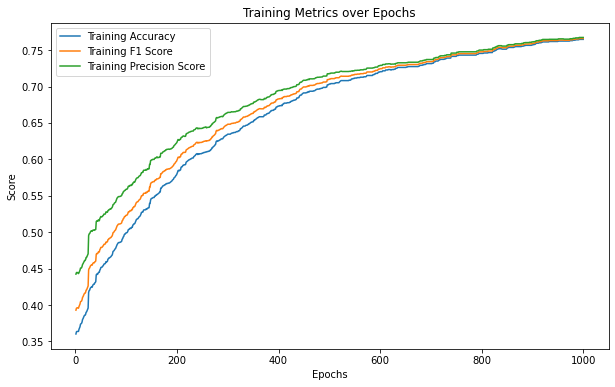

In [11]:
X = loaded_df1['text']
y = loaded_df1['label']
count_vectorizer = CountVectorizer()
X_transformed = count_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=100)

# Define the MLP model class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros(self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros(self.output_size)
        self.output = None
        self.train_loss = []

    def forward(self, x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.output = self.softmax(self.z2)
        return self.output

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def backward(self, x, y, learning_rate=0.01):
        batch_size = x.shape[0]
        delta3 = self.output - self.one_hot(y)
        dW2 = np.dot(self.a1.T, delta3) / batch_size
        db2 = np.sum(delta3, axis=0) / batch_size
        delta2 = np.dot(delta3, self.weights2.T) * (1 - np.power(self.a1, 2))
        dW1 = np.dot(x.T, delta2) / batch_size
        db1 = np.sum(delta2, axis=0) / batch_size

        # Update weights and biases
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1

    def one_hot(self, y):
        one_hot_y = np.zeros((len(y), self.output_size))
        one_hot_y[np.arange(len(y)), y] = 1
        return one_hot_y

    def train(self, X, y, num_epochs=1000, learning_rate=0.01):
        self.train_loss = []
        self.train_accuracy = []
        self.train_f1 = []
        self.train_precision = []

        for epoch in range(num_epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            # Calculate loss and metrics on the training set and store them
            loss = self.calculate_loss(output, self.one_hot(y))
            self.train_loss.append(loss)

            y_pred_encoded = self.forward(X)
            y_pred = np.argmax(y_pred_encoded, axis=1)

            accuracy = accuracy_score(y, y_pred)
            f1 = f1_score(y, y_pred, average='weighted')
            precision = precision_score(y, y_pred, average='weighted')

            self.train_accuracy.append(accuracy)
            self.train_f1.append(f1)
            self.train_precision.append(precision)
            
            
    def calculate_loss(self, output, one_hot_y):
        # Cross-entropy loss
        m = one_hot_y.shape[0]
        loss = -np.sum(np.log(output) * one_hot_y) / m
        return loss


input_size = X_train.shape[1]  # Number of features
hidden_size = 64
output_size = len(y_train.unique())  # Number of classes

model = MLP(input_size, hidden_size, output_size)
model.train(X_train.toarray(), y_train)


y_pred_encoded = model.forward(X_test.toarray())
y_pred = np.argmax(y_pred_encoded, axis=1)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision Score:", precision)

# Plotting
epochs = range(1, len(model.train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, model.train_accuracy, label='Training Accuracy')
plt.plot(epochs, model.train_f1, label='Training F1 Score')
plt.plot(epochs, model.train_precision, label='Training Precision Score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.title('Training Metrics over Epochs')
plt.show()


# Hybrid or Ensemble Model of RandomForest Classifier and Gradient Boosting

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

X = loaded_df1.drop('label', axis=1)
y = loaded_df1['label']

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Random Forest and Gradient Boosting models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_imputed, y_train)
gb_model.fit(X_train_imputed, y_train)


rf_predictions = rf_model.predict(X_test_imputed)
gb_predictions = gb_model.predict(X_test_imputed)

# Combine predictions using a simple majority vote
ensemble_predictions = np.array([rf_predictions, gb_predictions])
final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=ensemble_predictions)

# Calculate accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

#accuracy = accuracy_score(y_test, y_pred)
ensemble_f1 = f1_score(y_test,final_predictions, average='weighted')
ensemble_precision = precision_score(y_test, final_predictions, average='weighted')

print("F1 Score:", ensemble_f1)
print("Precision Score:", ensemble_precision)


Ensemble Accuracy: 1.0
F1 Score: 1.0
Precision Score: 1.0


# Ensemble Model of RandomForest Classifier and Support Vector Machine

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = loaded_df1.drop('label', axis=1)
y = loaded_df1['label']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


label_encoder = LabelEncoder()
X_encoded = X_imputed_df.copy()
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])


X_numeric = X_encoded.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the ML models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

# Ensemble using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('svm', svm_model)
], voting='soft')

ensemble.fit(X_train_scaled, y_train)


ensemble_predictions = ensemble.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Ensemble Accuracy:", ensemble_accuracy)






Random Forest Accuracy: 1.0
SVM Accuracy: 0.8870748299319728
Ensemble Accuracy: 0.9891156462585035


# Ensemble of RF , SVM and Simple Neural Network

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = loaded_df1.drop('label', axis=1)
y = loaded_df1['label']
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


label_encoder = LabelEncoder()
X_encoded = X_imputed_df.copy()
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

X_numeric = X_encoded.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the ML models
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

# Define a simple DL prediction function
def predict_dl_model(weights, bias, X):
    z = np.dot(X, weights) + bias
    y_pred = 1 / (1 + np.exp(-z))
    return y_pred

dl_weights = np.random.randn(X_train_scaled.shape[1])
dl_bias = 0
dl_predictions = predict_dl_model(dl_weights, dl_bias, X_test_scaled)

# Combine ML and DL predictions using a VotingClassifier
class CustomEnsemble:
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        predictions = []
        for model in self.models:
            if np.array_equal(model, dl_predictions):
                predictions.append(model)
            else:
                predictions.append(model.predict(X))
        combined_predictions = np.mean(predictions, axis=0)
        return np.round(combined_predictions)


ensemble_model = CustomEnsemble(models=[rf_model, svm_model, dl_predictions])

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test_scaled)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Ensemble Accuracy:", ensemble_accuracy)


Random Forest Accuracy: 1.0
SVM Accuracy: 0.8870748299319728
Ensemble Accuracy: 0.9578231292517007


# Visualisations of the Models

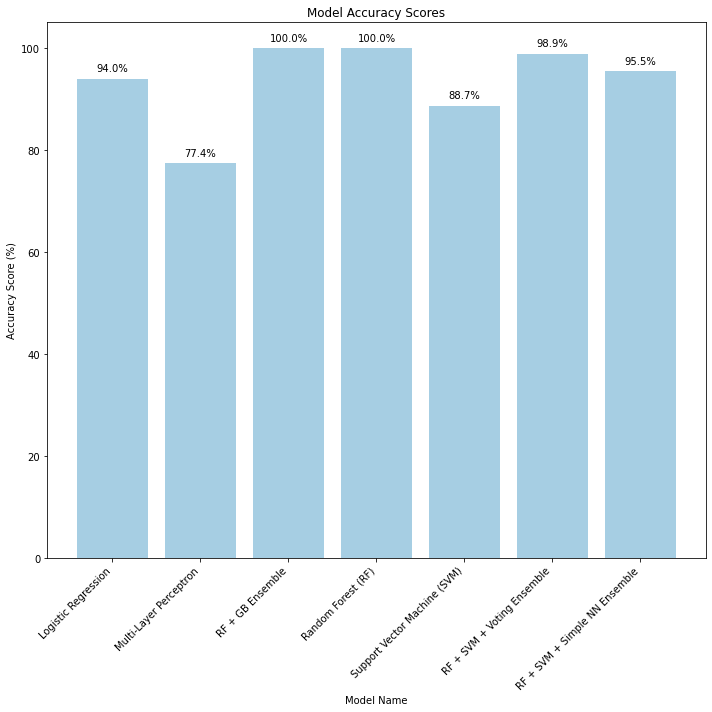

In [16]:
import matplotlib.pyplot as plt

models = [
    "Logistic Regression", 
    "Multi-Layer Perceptron", 
    "RF + GB Ensemble", 
    "Random Forest (RF)", 
    "Support Vector Machine (SVM)", 
    "RF + SVM + Voting Ensemble", 
    "RF + SVM + Simple NN Ensemble"
]
accuracy_scores = [94.0, 77.4, 100.0, 100.0, 88.7, 98.9, 95.5]

# Define colors (using hex color codes) for each bar
colors = ['#a6cee3', '#a6cee3', '#a6cee3', '#a6cee3', '#a6cee3', '#a6cee3', '#a6cee3']

# Create a bar chart
plt.figure(figsize=(10, 10))
bars = plt.bar(models, accuracy_scores, color=colors)
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{score}%", ha='center', va='bottom', fontsize=10)


plt.title("Model Accuracy Scores")
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


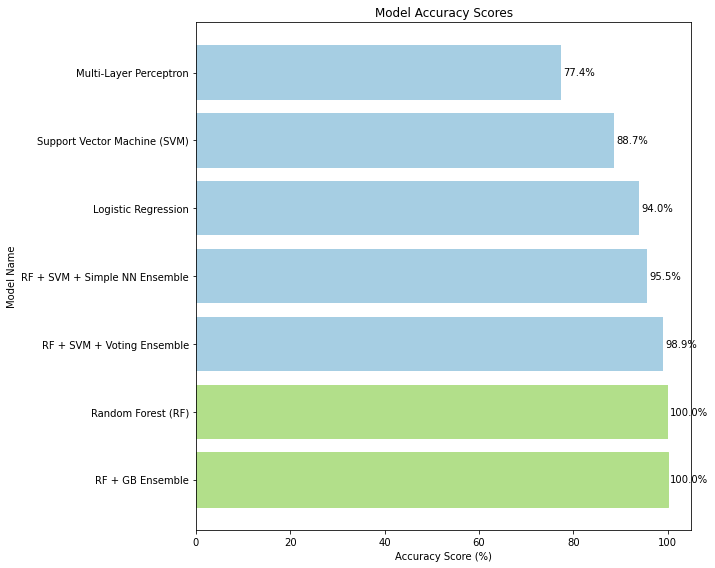

In [18]:
# Find the index of the highest accuracy score
highest_idx = accuracy_scores.index(max(accuracy_scores))

# Order the models and accuracy scores based on descending accuracy
sorted_indices = sorted(range(len(accuracy_scores)), key=lambda k: accuracy_scores[k], reverse=True)
models = [models[i] for i in sorted_indices]
accuracy_scores = [accuracy_scores[i] for i in sorted_indices]

colors = ['#b2df8a', '#b2df8a', '#a6cee3', '#a6cee3', '#a6cee3', '#a6cee3', '#a6cee3']

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(models, accuracy_scores, color=colors)

# Highlight the bar with the highest accuracy
bars[highest_idx].set_color('#b2df8a')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f"{score}%", va='center', fontsize=10)

plt.title("Model Accuracy Scores")
plt.xlabel("Accuracy Score (%)")
plt.ylabel("Model Name")
plt.tight_layout()
plt.show()

